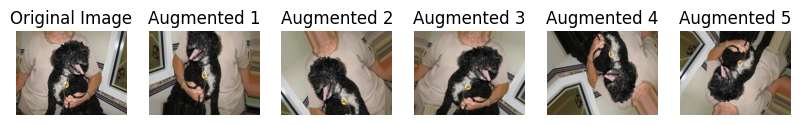

In [3]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import random
import os

chosen_image = random.choice(os.listdir("D:\DATA SCIENCE\CLOUD\DATASETS\cats_and_dogs\SANDBOX\\train\dog"))
image_path = os.path.join("D:\DATA SCIENCE\CLOUD\DATASETS\cats_and_dogs\SANDBOX\\train\dog", chosen_image)

# Load an image from file
img = load_img(image_path)

# Convert the image to a NumPy array
img_array = img_to_array(img)
# Ensure that the image has 3 channels (for RGB images)
if img_array.shape[2] == 1:
    img_array = img_array.reshape((img_array.shape[0], img_array.shape[1], 3))
img_array = img_array.reshape((1,) + img_array.shape)

# Define an ImageDataGenerator
datagen = ImageDataGenerator(
    # Flip the image horizontally
    horizontal_flip=True,
    # Flip the image vertically
    vertical_flip=True,
    # Rotate the image by a given angle (in degrees)
    rotation_range=45,
    # Zoom in/out on the image
    zoom_range=0.2,
    # Crop the image by a specified fraction
    width_shift_range=0.1,
    height_shift_range=0.1,
    # Vary the color of the image
    brightness_range=[0.5, 1.5]
)

# Generate augmented images
augmented_images = []

# Number of augmented images you want to generate
num_augmented_images = 5

for _ in range(num_augmented_images):
    augmented_img_array = datagen.flow(img_array).next()[0]
    augmented_images.append(array_to_img(augmented_img_array.astype('uint8')))

# Display the original and augmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, num_augmented_images + 1, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

for i in range(num_augmented_images):
    plt.subplot(1, num_augmented_images + 1, i + 2)
    plt.imshow(augmented_images[i])
    plt.title(f'Augmented {i+1}')
    plt.axis('off')

plt.show()